In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [25]:
snap_2 = pd.read_csv('snap.csv')

In [26]:
def mean_bp(x):
    if x < 20.0:
        return 19
    elif x>=20 and x<30:
        return 9
    else:
        return 0

def temp(x):
    if x>35.6:
        return 0
    elif x>35 and x<=35.6:
        return 8
    else:
        return 15
    
def po2_fio2(x):
    if x>2.49:
        return 0
    elif x>1.0 and x<=2.49:
        return 5
    elif x>0.3 and x<=0.99:
        return 16
    else:
        return 28    
    
def ph_calc(x):
    if x>7.20:
        return 0
    elif x>7.10 and x<=7.19:
        return 7
    else:
        return 16
    
def urine_output_calc(x):
    if x>=1.0:
        return 0
    elif x>0.1 and x<=0.9:
        return 5
    else:
        return 18
    
def apgar(x):
    if x>=7:
        return 0
    else:
        return 8
    
def birthweight_calc(x):
    if x>=1000.0:
        return 0
    elif x>750.0 and x<=999.0:
        return 10
    else:
        return 17
    
def sga_calc(x):
    if x==0:
        return 0
    else:
        return 12
    
def snap_2_pred(x):
    if x > 5:
        return 1
    else:
        return 0
    
def bina(x):
    if x == 'Death':
        return 1
    else:
        return 0

In [27]:
snap_2['score'] = snap_2.central_temp.apply(temp) + snap_2.bp_mean.apply(mean_bp) + snap_2.new_ph.apply(ph_calc) + snap_2.po2_fio2_ratio.apply(po2_fio2) + snap_2.urine_output.apply(urine_output_calc)

In [28]:
snap_2['pred'] = snap_2.score.apply(snap_2_pred)

In [29]:
snap_2['true_outcome'] = snap_2.dischargestatus.apply(bina)

In [30]:
lr_fpr, lr_tpr, _ = roc_curve(snap_2.true_outcome,snap_2.pred,drop_intermediate=False)

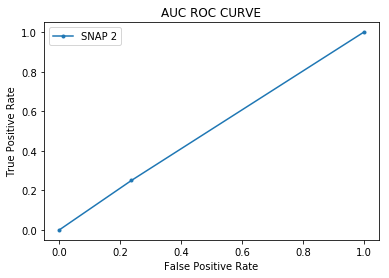

In [31]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.title('AUC ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(lr_fpr, lr_tpr, marker='.', label='SNAP 2')
plt.legend(loc=0)

In [32]:
roc_auc_score(snap_2.true_outcome,snap_2.pred)

0.5066105769230769

In [33]:
cols_snappe = ['uhid', 'dischargestatus', 'birthweight', 
       'weight_galevel', 'central_temp', 'bp_mean', 'admissionweight',
       'new_ph', 'apgar_fivemin', 'po2_fio2_ratio',
       'urine_output']

In [34]:
snappe = pd.read_csv('snappe.csv')

In [35]:
snappe['score'] = snappe.bp_mean.apply(mean_bp) + snappe.central_temp.apply(temp) + snappe.po2_fio2_ratio.apply(po2_fio2) + snappe.new_ph.apply(ph_calc)+snappe.urine_output.apply(urine_output_calc)+snappe.apgar_fivemin.apply(apgar)+snappe.birthweight.apply(birthweight_calc)+snappe.weight_galevel.apply(sga_calc)

In [36]:
def snappe_pred(x):
    if x>5:
        return 1
    else:
        return 0

In [37]:
snappe['pred'] = snappe['score'].apply(snappe_pred)
snappe['true_outcome'] = snappe['dischargestatus'].apply(bina)

In [38]:
snappe_fpr, snappe_tpr, _ = roc_curve(snappe.true_outcome,snappe.pred,drop_intermediate=False)

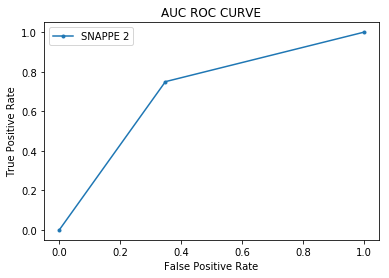

In [39]:
import matplotlib.pyplot as plt

plt.title('AUC ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(snappe_fpr, snappe_tpr, marker='.', label='SNAPPE 2')
plt.legend(loc=0)

In [40]:
roc_auc_score(snappe.true_outcome,snappe.pred)

0.7007211538461539

In [41]:
snap = pd.DataFrame(snap_2.true_outcome)

In [42]:
snap['pred'] = snap_2.pred

In [43]:
snappe_2 = pd.DataFrame(snappe.true_outcome)

In [44]:
snappe_2['pred'] = snappe.pred

In [45]:
#SNAPPE 2
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(snappe.true_outcome,snappe.pred))
print(confusion_matrix(snappe.true_outcome,snappe.pred))

              precision    recall  f1-score   support

           0       0.99      0.65      0.79      1664
           1       0.03      0.75      0.06        24

   micro avg       0.65      0.65      0.65      1688
   macro avg       0.51      0.70      0.42      1688
weighted avg       0.98      0.65      0.78      1688

[[1084  580]
 [   6   18]]


In [46]:
#SNAP 2
print(classification_report(snap_2.true_outcome,snap_2.pred))
print(confusion_matrix(snap_2.true_outcome,snap_2.pred))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      1664
           1       0.01      0.25      0.03        24

   micro avg       0.76      0.76      0.76      1688
   macro avg       0.50      0.51      0.44      1688
weighted avg       0.97      0.76      0.85      1688

[[1270  394]
 [  18    6]]
